In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.preprocessing import PowerTransformer
import sklearn.metrics as metrics

data = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis.xlsx', engine="openpyxl")

data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
cols = [] 
for col in data.columns: 
    cols.append(col.lower().replace(' ', '_')) 
data.columns = cols

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data_num = data._get_numeric_data()
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
data_num = data_num.drop_duplicates() #droping duplicates to have a better overview

In [7]:
data_num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [8]:
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
#droping Income for the amount of zeros and for being irrelevant as the same as numer of complaints
data_num = data_num.drop(['number_of_open_complaints','income'] , axis=1)
data_num.head()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,69,32,5,1,384.811147
1,6979.535903,94,13,42,8,1131.464935
2,12887.431650,108,18,38,2,566.472247
3,7645.861827,106,18,65,7,529.881344
4,2813.692575,73,12,44,1,138.130879


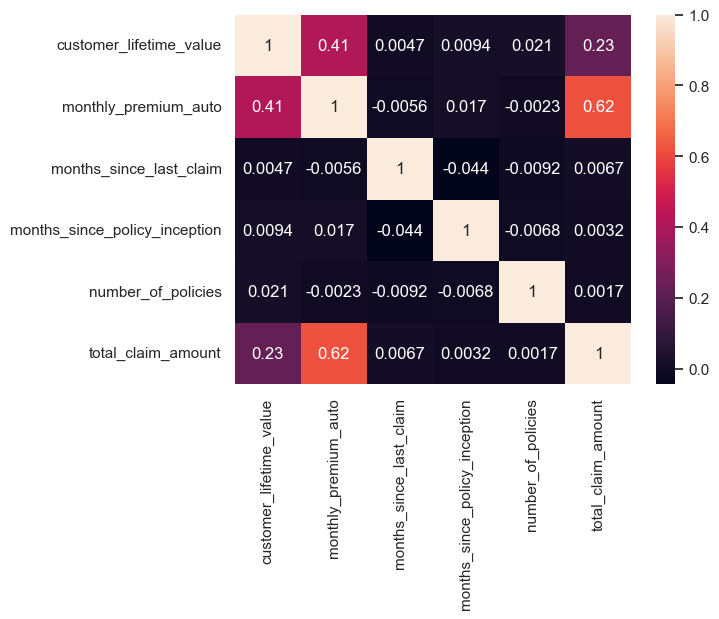

In [10]:
correlations_matrix = data_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [11]:
X = data_num.drop(['total_claim_amount'],axis=1)
y = data_num['total_claim_amount']

transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X.columns)

(8044, 5)


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,-0.757111,-0.705739,1.666109,-1.536129,-0.830979
1,-0.150471,0.026531,-0.212859,-0.215489,2.102796
2,0.699613,0.436602,0.281607,-0.358261,-0.411869
3,-0.054594,0.378020,0.281607,0.605449,1.683686
4,-0.749892,-0.588576,-0.311752,-0.144103,-0.830979
...,...,...,...,...,...
8039,-0.564749,0.319439,0.083821,0.355599,-0.830979
8040,2.213123,-0.588576,0.281607,1.462081,-0.411869
8041,0.019945,-0.237087,-0.608431,-0.393954,-0.411869
8042,-0.072065,0.085112,1.863895,-1.607515,0.007242


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5630, 5)
(2414, 5)
(5630,)
(2414,)


In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)
#r2 train
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.39222204340609335

In [14]:
#r2 test
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.3815151836778585

In [15]:
#RMSE train
np.sqrt(mean_squared_error(y_train,y_pred_train))

228.81839798788997

In [16]:
#RMSE test
np.sqrt(mean_squared_error(y_test,y_pred_test))

238.35174008649292

In [17]:
#MAE test
maetest = metrics.mean_absolute_error(y_test, y_pred_test)
print (maetest)

164.47294838094464


In [18]:
#MAE Train
maetrain = metrics.mean_absolute_error(y_train, y_pred_train)
print (maetrain)

156.8336192183185


In [19]:
#MSE test
msetest = metrics.mean_squared_error(y_test, y_pred_test)
print (msetest)

56811.55200225907


In [20]:
#MSE train
msetrain = metrics.mean_squared_error(y_train, y_pred_train)
print (msetrain)

52357.85925774441
